[En français](../command-line_example_fr/)  

![ECCC logo](https://eccc-msc.github.io/open-data/img_eccc-logo.png)  

[TOC](https://eccc-msc.github.io/open-data/readme_en/) > [Usage overview](https://eccc-msc.github.io/open-data/usage/readme_en/) > GDAL command line examples

# Basic GDAL command line example, using weather data

## Introduction

[MSC GeoMet](https://eccc-msc.github.io/open-data/msc-geomet/readme_en/) and [MSC_Datamart](https://eccc-msc.github.io/open-data/msc-datamart/readme_en/) data can be manipulated via the command line using [GDAL](https://gdal.org/), a widely-known software library used to read and write raster and vector geospatial data. In the following examples, we'll download a GeoTIFF file using via a Web Coverage Service (WCS) request with GeoMet. This tutorial will show you how to:
* Display the GDAL version installed on your system
* Save a WCS request output to your computer
* List information/metadata related to the raster file
* Reproject a raster file
* Convert a GeoTIFF file to the NetCDF file format
* Get the value for a specific point based on a location in longitude/latitude

There are various ways to install GDAL, please refer to https://gdal.org/ for more information.

To run the following GDAL command line examples, you need to have a basic knowledge of using the terminal command line. These examples work within a bash terminal. 

The [interactive version of this Jupyter Notebook is available](https://mybinder.org/v2/gh/ECCC-MSC/open-data/master?filepath=docs%2Fusage%2Fbasic_gdal_example%2fbasic_gdal_exemple_en.ipynb).

[![badge](https://img.shields.io/badge/Interactive%20version-binder-F5A252.svg?logo=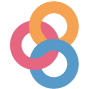)](https://mybinder.org/v2/gh/ECCC-MSC/open-data/master?filepath=docs%2Fusage%2Fbasic_gdal_example%2fbasic_gdal_exemple_en.ipynb)

## Show GDAL version

GDAL is a suite of several command line tools. When you install GDAL you get all the different command line tools. The most basic tool is `gdalinfo` which can be used to retrieve information pertaining to your GDAL installation and display information about a raster file.

In [1]:
%%bash

gdalinfo --version

GDAL 3.1.1, released 2020/06/22


## Save a WCS request output to disk

The OGC Web Coverage Service requests enable a client to retrieve coverage information from a raster file for a given area of interest. WCS requests are made over the internet (HTTPS) and give the user more flexibility when requesting information about the coverage of a layer compared with the more traditional way of downloading flat files. The Web Coverage Service allows for several different types of requests, each of which are described in further detail below.

For more information on the WCS request parameters, please refer to the [MSC GeoMet WCS GetCoverage page](https://eccc-msc.github.io/open-data/msc-geomet/web-services_en/#wcs-getcoverage).

We are going to use a `curl` command to save the WCS request result on disk, the file will be named `CMC_glb_TMP.tif`. The result is a GeoTIFF file, showing temperature (°C) from a subset of MSC's Global Deterministic Prediction System (GDPS).

In [4]:
%%bash

curl "https://geo.weather.gc.ca/geomet?SERVICE=WCS&VERSION=2.0.1&REQUEST=GetCoverage&COVERAGEID=GDPS.ETA_TT&SUBSETTINGCRS=EPSG:4326&SUBSET=x(-120,-85)&SUBSET=y(48,66)&RESOLUTION=x(0.24)&RESOLUTION=y(0.24)&FORMAT=image/tiff" > CMC_glb_TMP.tif 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44266  100 44266    0     0  78208      0 --:--:-- --:--:-- --:--:-- 78208


## Lists information about a raster file

The `gdalinfo` tool can be to retrieve the downloaded raster file's metadata. The command's output will list some information on the file, such as:
* File format
* File size
* Coordinate system
* Metadata
* Band information

In [11]:
%%bash

gdalinfo CMC_glb_TMP.tif

Driver: GTiff/GeoTIFF
Files: CMC_glb_TMP.tif
Size is 146, 75
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-119.999862068965513,66.000000000000000)
Pixel Size = (0.239724137931034,-0.240000000000000)
Metadata:
  AREA_OR_POINT=Area
  TIFFTAG_RESOLUTIONUNIT=2 (pixels/inch)
  TIFFTAG_XRESOLUTION=72
  TIFFTAG_YRESOLUTION=72
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-119.9998621,  66.0000000) (119d59'59.50"W, 66d 0' 0.00"N)
Lower Left  (-1

It is also possible to use `gdalinfo` to retrieve some basic statistics of the raster file, such as minimum and maximum value by adding the `-mm` option. Note that the resulting values are in °C.

In [21]:
%%bash

gdalinfo -mm CMC_glb_TMP.tif | grep Min/Max

    Computed Min/Max=0.728,27.828


Adding the `-proj4` option to `gdalinfo` will output the projection definition as a proj4 string

In [24]:
%%bash

gdalinfo -proj4 CMC_glb_TMP.tif | grep PROJ.4 -A 1

PROJ.4 string is:
'+proj=longlat +datum=WGS84 +no_defs'


## Reproject a raster file

Using the `gdalwarp` command, we can reproject a raster file. Using MSC GeoMet and MSC Datamart data, you only need to provide an output projection definition corresponding to a EPSG code, or you can use a proj4 string.

The following example reproject our GeoTIFF into an EPSG:3857 projection. The output file is named `CMC_glb_TMP_epsg3857.tif`

In [25]:
%%bash

gdalwarp -t_srs EPSG:3857 CMC_glb_TMP.tif CMC_glb_TMP_epsg3857.tif

Creating output file that is 118P x 114L.
Processing CMC_glb_TMP.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


Then we can use `gdalinfo` for to look at the coordinates and the proj4 string to ensure that the projection of `CMC_glb_TMP_epsg3857.tif` really is different from the original file.

In [26]:
%%bash

gdalinfo -proj4 epsg3857.tif | grep -E '(PROJ.4|Corner Coordinates:)' -A 5

PROJ.4 string is:
'+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs'
Origin = (-20037500.189506221562624,17439592.350557137280703)
Pixel Size = (19796.259162699658191,-19796.259162699658191)
Metadata:
  AREA_OR_POINT=Area
--
Corner Coordinates:
Upper Left  (-20037500.190,17439592.351) (179d59'59.74"W, 82d34' 7.50"N)
Lower Left  (-20037500.190,-17441416.294) (179d59'59.74"W, 82d34'15.13"S)
Upper Right (20030128.356,17439592.351) (179d56' 1.34"E, 82d34' 7.50"N)
Lower Right (20030128.356,-17441416.294) (179d56' 1.34"E, 82d34'15.13"S)
Center      (   -3685.917,    -911.972) (  0d 1'59.20"W,  0d 0'29.49"S)


## Convert a GeoTIFF file to the NetCDF file format

Using `gdal_translate` command, we can convert a raster file from any supported format (`gdalinfo --formats`) into another raster file format.

In this example, we convert our GeoTIFF file to a NetCDF file. The `-of NetCDF` parameter tells gdal_translate in which format to do the projection. The output file will be named `CMC_glb_TMP.nc`

In [27]:
%%bash

gdal_translate -of NetCDF CMC_glb_TMP.tif CMC_glb_TMP.nc

Input file size is 146, 75
0...10...20...30...40...50...60...70...80...90...100 - done.


Then using `gdalinfo` we can make sure the output NetCDF file is a valid raster file.

In [29]:
%%bash

gdalinfo CMC_glb_TMP.nc

Driver: netCDF/Network Common Data Format
Files: CMC_glb_TMP.nc
Size is 146, 75
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-119.999862068965513,66.000000000000000)
Pixel Size = (0.239724137931034,-0.240000000000000)
Metadata:
  Band1#grid_mapping=crs
  Band1#long_name=GDAL Band Number 1
  Band1#_FillValue=9.96921e+36
  crs#GeoTransform=-119.9998620689655 0.2397241379310344 0 66 0 -0.24 
  crs#grid_mapping_name=latitude_longitude
  crs#inverse_flattening=298.25722356

## Get the value for a specific point based on a location in longitude/latitude

Using `gdallocationinfo` command we can get the raw value of a pixel by specifying a location in either longitude/latitude or by specifying a pixel position. 

In the following example, we use longitude/latitude. The resulting value is in °C.

In [32]:
%%bash

gdallocationinfo -wgs84 CMC_glb_TMP.tif -100 50

Report:
  Location: (83P,66L)
  Band 1:
    Value: 16.4780216217041
